<a href="https://colab.research.google.com/github/oscaraparram/python_code_public/blob/main/Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Dense

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive/")
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [ ]:
img_width = 180
img_height =180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 306 files belonging to 4 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple', 'banana', 'mango', 'potato']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 39 files belonging to 4 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 39 files belonging to 4 classes.


In [ ]:
print(data_test_path)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
)

Fruits_Vegetables/test
Found 39 files belonging to 4 classes.


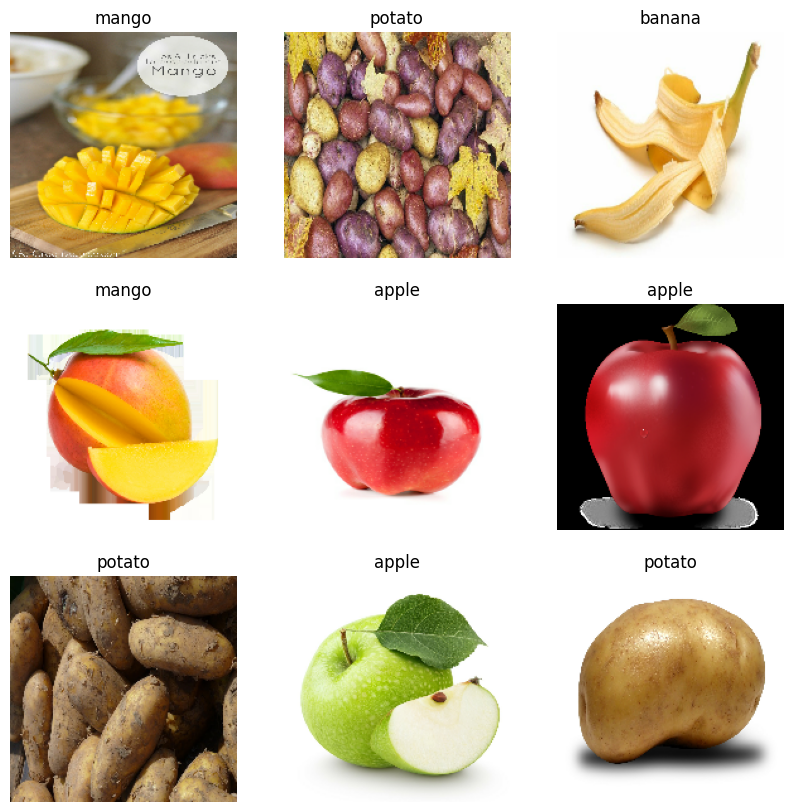

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
10/10 [==============================] - 17s 1s/step - loss: 6.6966 - accuracy: 0.2810 - val_loss: 1.3868 - val_accuracy: 0.3333
Epoch 2/25
10/10 [==============================] - 16s 954ms/step - loss: 1.2765 - accuracy: 0.3856 - val_loss: 1.0869 - val_accuracy: 0.6410
Epoch 3/25
10/10 [==============================] - 16s 1s/step - loss: 1.0204 - accuracy: 0.5719 - val_loss: 0.7929 - val_accuracy: 0.6667
Epoch 4/25
10/10 [==============================] - 15s 880ms/step - loss: 0.7439 - accuracy: 0.7451 - val_loss: 0.5889 - val_accuracy: 0.8205
Epoch 5/25
10/10 [==============================] - 15s 968ms/step - loss: 0.5424 - accuracy: 0.8497 - val_loss: 0.6416 - val_accuracy: 0.7692
Epoch 6/25
10/10 [==============================] - 16s 999ms/step - loss: 0.4579 - accuracy: 0.8399 - val_loss: 0.4412 - val_accuracy: 0.8718
Epoch 7/25
10/10 [==============================] - 15s 930ms/step - loss: 0.3619 - accuracy: 0.8856 - val_loss: 0.3493 - val_accuracy: 0.8718
Epoch

Text(0.5, 1.0, 'Loss')

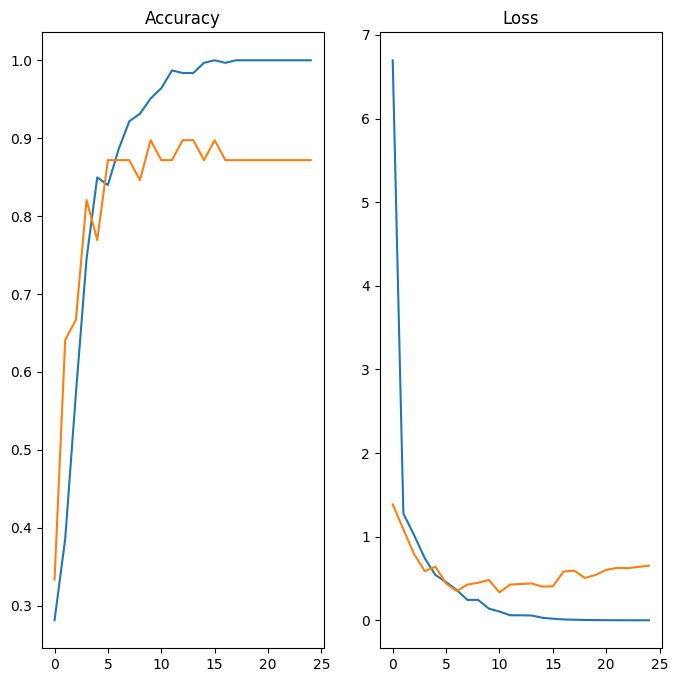

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
from google.colab import files
import tensorflow as tf
from PIL import Image
import io

uploaded = files.upload()

# Obteniendo el nombre del archivo cargado
filename = next(iter(uploaded))

# Cargando la imagen
image = Image.open(io.BytesIO(uploaded[filename]))

# Redimensionando la imagen
image = image.resize((img_height, img_width))

# Convirtiendo la imagen a un array
img_arr = tf.keras.preprocessing.image.img_to_array(image)

# Expandiendo las dimensiones del array
img_bat = tf.expand_dims(img_arr, 0)


Saving Kiwi-fruits-582a07b.jpg to Kiwi-fruits-582a07b.jpg


In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 31ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit la imagen es {} con precisión de  {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit la imagen es banana con precisión de  85.72
